<a href="https://colab.research.google.com/github/AshnakAGQ/BDSM/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tf-nightly
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input

!unzip -q data.zip  #unzips kaggle data into content/data

In [40]:
image_size = (224, 224)
batch_size = 10

full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = False
)

Found 100 files belonging to 10 classes.


Show true values

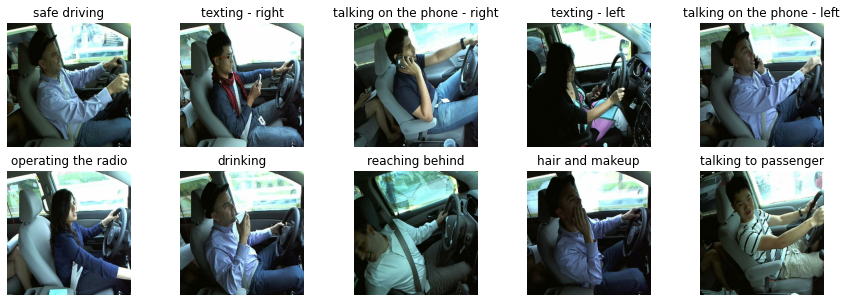

In [47]:
import matplotlib.pyplot as plt
classes = ["safe driving", "texting - right", "talking on the phone - right", "texting - left", "talking on the phone - left", "operating the radio", "drinking", "reaching behind", "hair and makeup", "talking to passenger"]

plt.figure(figsize=(15, 5))
i=0
for images, labels in full_ds:
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[int(labels[i])])
    plt.axis("off")
    i += 1

In [48]:
vgg_model = keras.models.load_model('frozen_vgg16_model.h5')
def VGG_preprocess(image,score):
    image = keras.applications.vgg16.preprocess_input(image)
    if score is None:
        return image
    else:
        return image, score

test = full_ds.map(VGG_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test.prefetch(tf.data.experimental.AUTOTUNE)

scores = vgg_model.evaluate(test, verbose=0)
predictions = vgg_model.predict(test)
accuracies = (scores[1] * 100)
losses = (scores[0])

print('------------------------------------------------------------------------')
print(f'> Accuracy: {accuracies}')
print(f'> Loss: {losses}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
> Accuracy: 100.0
> Loss: 2.9801144592056517e-06
------------------------------------------------------------------------


Show predictions

(100,)


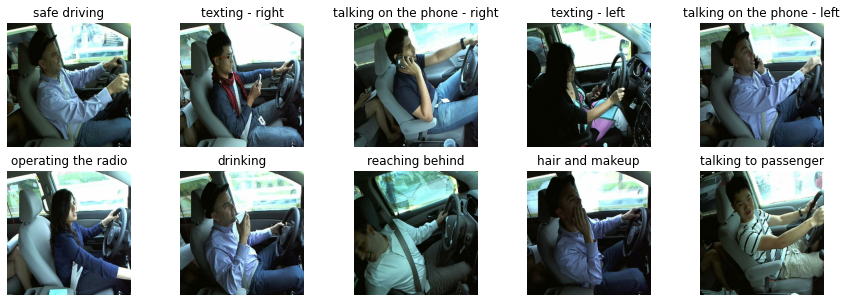

In [79]:
import numpy as np

plt.figure(figsize=(15, 5))
pred = np.argmax(predictions, axis=1)
print(pred.shape)

i=0

for images, labels in full_ds:
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(classes[i])
  plt.axis("off")
  i += 1
examples_per_class = 1

plt.show()

Show incorrect predictions

In [82]:
i = 0
k = 0
for images, labels in full_ds:
  for j in range(10):
    if labels[j] != pred[i*10+j]:
      ax = plt.subplot(3, 3, np.max(k, 9))
      plt.imshow(images[j].numpy().astype("uint8"))
      plt.title(classes[i*10+j])
      plt.axis("off")
      k+=1
  i += 1
if k==0:
  print("No errors to show!")

plt.show()

No errors to show!
